In [2]:
# load the different json files
import loaddata
import pandas as pd
import seaborn 

movie_dicts = loaddata.load_mojo_data()
movie_df = pd.DataFrame(movie_dicts)

meta_dicts = loaddata.load_metacritic_data()
meta_df = pd.DataFrame(meta_dicts)

Parsed 3728 movies from 3728 files
Parsed 4765 metacritic files from 4767 files


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [21]:
# look at the movie file
#movie_df.head(1)

In [22]:
# look at the meta file
#meta_df.head(1)

In [3]:
# merge the data 
movie_df['title_strip']=movie_df['title'].str.strip()
meta_df['title_strip']=meta_df['title'].str.strip()

movie_inner=movie_df.merge(meta_df,on='title_strip', how='inner')


In [75]:
movie_inner.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year_x,metascore,num_user_ratings,runtime_minutes,...,top_director_ind,big_studio,drama_ind,action_ind,scifi_ind,comedy_ind,thriller_ind,documentary_ind,romance_ind,family_ind
count,3.246000e+03,3166.000000,3.166000e+03,1.451000e+03,3186.000000,2.547000e+03,3298.000000,3221.000000,3163.000000,3247.000000,...,3300,3300,3300.000000,3300,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,3.646224e+07,7826.065066,8.953362e+06,4.571090e+07,1377.556497,9.140167e+07,2004.987871,57.694815,120.453051,107.474592,...,0.01939394,0.4130303,0.141818,0,0.051818,0.239091,0.306364,0.026364,0.198182,0.081818
std,5.661826e+07,8429.076101,1.397680e+07,4.034660e+07,1288.534434,1.487597e+08,8.713648,18.186875,216.955132,19.431917,...,0.137926,0.4924528,0.348916,0,0.221693,0.426593,0.461052,0.160238,0.398690,0.274129
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1936.000000,1.000000,4.000000,48.000000,...,False,False,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.809290e+05,3275.250000,5.002875e+04,1.675000e+07,56.000000,5.902596e+06,2001.000000,45.000000,23.000000,94.000000,...,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.409998e+07,5570.000000,3.546214e+06,3.400000e+07,1135.000000,3.729544e+07,2007.000000,58.000000,57.000000,104.000000,...,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.028636e+07,9470.500000,1.279583e+07,6.500000e+07,2588.500000,1.170476e+08,2011.000000,72.000000,128.000000,117.000000,...,0,1,0.000000,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4390.000000,2.787965e+09,2015.000000,100.000000,4002.000000,325.000000,...,True,True,1.000000,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
movie_inner.columns

Index([           u'alt_title',           u'director_x',
             u'domestic_gross',            u'mojo_slug',
        u'opening_per_theater', u'opening_weekend_take',
          u'production_budget', u'release_date_limited',
          u'release_date_wide',              u'title_x',
             u'widest_release',      u'worldwide_gross',
                     u'year_x',          u'title_strip',
                   u'complete',           u'director_y',
                      u'genre',      u'metacritic_page',
                  u'metascore',   u'num_critic_reviews',
           u'num_user_ratings',     u'num_user_reviews',
                     u'rating',         u'release_date',
            u'runtime_minutes',               u'studio',
                    u'title_y',   u'unable to retrieve',
                 u'user_score',               u'year_y',
               u'recent_movie',      u'num_of_theaters',
                u'total_gross',     u'top_director_ind'],
      dtype='object')

In [4]:
movie_inner['recent_movie'] = [1 if item >= 2000 else 0 for item in movie_inner['year_x']]
movie_inner['num_of_theaters'] = movie_inner['opening_weekend_take']/movie_inner['opening_per_theater']
top_directors = movie_inner.director_x.value_counts().index[movie_inner.director_x.value_counts()>=10]
movie_inner['top_director_ind'] = movie_inner['director_x'].isin(top_directors)
movie_inner['total_gross'] = movie_inner['worldwide_gross'] + movie_inner['domestic_gross']

In [5]:
big_studios = movie_inner.studio.value_counts().index[:9]
movie_inner['big_studio'] = movie_inner['studio'].isin(big_studios)
print movie_inner.big_studio.value_counts()

False    1937
True     1363
dtype: int64


In [6]:
movie_inner['drama_ind'] = movie_inner['genre'].apply(lambda x: 1 if x.find('Drama') > 0 else 0)
movie_inner['action_ind'] = movie_inner['genre'].apply(lambda x: 1 if x.find('Action') > 0 else 0)
movie_inner['scifi_ind'] = movie_inner['genre'].apply(lambda x: 1 if x.find('Sci-Fi') > 0 else 0)
movie_inner['comedy_ind'] = movie_inner['genre'].apply(lambda x: 1 if x.find('Comedy') > 0 else 0)
movie_inner['thriller_ind'] = movie_inner['genre'].apply(lambda x: 1 if x.find('Thriller') > 0 else 1 if x.find('Horror') > 0 else 0)
movie_inner['documentary_ind'] = movie_inner['genre'].apply(lambda x: 1 if x.find('Documentary') > 0 else 0)
movie_inner['romance_ind'] = movie_inner['genre'].apply(lambda x: 1 if x.find('Romance') > 0 else 0)
movie_inner['family_ind'] = movie_inner['genre'].apply(lambda x: 1 if x.find('Family') > 0 else 0)

In [7]:
movie_inner['R_ind'] = movie_inner['rating'].apply(lambda x: 1 if x=="R" else 0)
movie_inner['PG13_ind'] = movie_inner['rating'].apply(lambda x: 1 if x in ['PG-13', 'PG--13'] else 0) 

In [ ]:
# production budget, genre, rating, big_studio, runtime_minutes, top_directors, num_of_theaters
# drama_ind action_ind scifi_ind comedy_ind thriller_ind documentary_ind romance_ind family_ind
## opening_weekend_take, user_score

Predicting meta score with some information about the movies

- Making 'prestigious' movie could be interesting to movie makers
- Budget, Rating (R/PG13), Genre, Big Studio (or not), Runtime, Top Directors, Number of Theaters, Recent movie (> 2000)
- Prediction is rather futile, although it is not entirely random



In [15]:
# build the model
import statsmodels as sm
import statsmodels.api as sma
import statsmodels.formula.api as smf
import numpy as np

from sklearn.cross_validation import train_test_split

entire_vars = ['metascore', 'production_budget', 'R_ind','PG13_ind', 'big_studio', 'runtime_minutes', 'top_director_ind',\
                 'num_of_theaters', 'drama_ind', 'action_ind', 'scifi_ind', 'comedy_ind', 'thriller_ind', 'documentary_ind', 
                 'romance_ind', 'family_ind', 'widest_release', 'recent_movie']
varlist1 = ['production_budget', 'R_ind','PG13_ind', 'big_studio', 'runtime_minutes', 'top_director_ind',\
                 'num_of_theaters', 'drama_ind', 'action_ind', 'scifi_ind', 'comedy_ind', 'thriller_ind', 'documentary_ind', 
                 'romance_ind', 'family_ind', 'widest_release', 'recent_movie']
df = movie_inner[entire_vars].dropna()

model1 = smf.ols('metascore ~ production_budget + R_ind + PG13_ind + big_studio + runtime_minutes + top_director_ind + \
                    num_of_theaters + drama_ind + action_ind + scifi_ind + comedy_ind + thriller_ind + documentary_ind + \
                    romance_ind + family_ind + widest_release + recent_movie', data=df).fit()
model2 = smf.ols('metascore ~ production_budget + R_ind + PG13_ind + big_studio + runtime_minutes + top_director_ind + \
                    num_of_theaters + drama_ind + action_ind + scifi_ind + comedy_ind + thriller_ind +  \
                    romance_ind + family_ind + widest_release', data=df).fit()
model3 = smf.ols('metascore ~ production_budget + PG13_ind + big_studio + runtime_minutes + top_director_ind + \
                    num_of_theaters + drama_ind + action_ind + scifi_ind + comedy_ind +  \
                    romance_ind + family_ind + widest_release', data=df).fit()
model4 = smf.ols('metascore ~ production_budget + PG13_ind + big_studio + runtime_minutes + top_director_ind + \
                    num_of_theaters + drama_ind + action_ind + comedy_ind + family_ind + widest_release', data=df).fit()
model5 = smf.ols('metascore ~ production_budget + PG13_ind + big_studio + runtime_minutes + top_director_ind + \
                    num_of_theaters + drama_ind + action_ind + comedy_ind + family_ind', data=df).fit()
model6 = smf.ols('metascore ~  PG13_ind + big_studio + runtime_minutes + top_director_ind + \
                    num_of_theaters + drama_ind + action_ind + comedy_ind + family_ind', data=df).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     31.36
Date:                Fri, 01 Jul 2016   Prob (F-statistic):           1.13e-81
Time:                        09:37:54   Log-Likelihood:                -5891.2
No. Observations:                1419   AIC:                         1.182e+04
Df Residuals:                    1402   BIC:                         1.191e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   37.0633      3.224     11.497      0.000        30.740    43.387
big_studio[T.True]           1.1281      0.878      1.284      0.199        -0.595     2.851
top_director_ind[T.True]     4.4894      1.827      2.458      0.014         0.906     8.073
production_budget         2.508e-08   1.46e-08      1.714      0.087     -3.62e-09  5.38e-08
R_ind                        0.8210      1.298      0.632      0.527        -1.725     3.367
PG13_ind                    -2.5746      1.315     -1.958      0.050        -5.154     0.005
runtime_minutes              0.2144      0.024      8.847      0.000         0.167     0.262
num_of_theaters             -0.0224      0.002    -12.039      0.000        -0.026    -0.019
drama_ind                    2.7793      1.159      2.398      0.017         0.506     5.053
action_ind               -2.108e-14   8.59e-15     -2.453      0.014     -3.79e-14 -4.22e-15
scifi_ind                    1.7723      1.564      1.133      0.257        -1.295     4.840
comedy_ind                   2.1898      1.013      2.162      0.031         0.203     4.177
thriller_ind                -0.6751      0.985     -0.685      0.493        -2.608     1.258
documentary_ind              1.1388      5.536      0.206      0.837        -9.721    11.999
romance_ind                 -1.5124      1.070     -1.414      0.158        -3.611     0.586
family_ind                   5.9296      1.742      3.405      0.001         2.513     9.346
widest_release               0.0177      0.002      9.188      0.000         0.014     0.021
recent_movie                -0.3230      1.120     -0.288      0.773        -2.520     1.874
==============================================================================
Omnibus:                        8.065   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.005
Skew:                          -0.180   Prob(JB):                       0.0183
Kurtosis:                       3.078   Cond. No.                     1.40e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.75e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [125]:
Y = df['metascore']
varlist1 = ['production_budget', 'R_ind','PG13_ind', 'big_studio', 'runtime_minutes', 'top_director_ind',\
                 'num_of_theaters', 'drama_ind', 'action_ind', 'scifi_ind', 'comedy_ind', 'thriller_ind', 'documentary_ind', 
                 'romance_ind', 'family_ind', 'widest_release', 'recent_movie']
varlist2 = ['production_budget', 'R_ind','PG13_ind', 'big_studio', 'runtime_minutes', 'top_director_ind',\
                 'num_of_theaters', 'drama_ind', 'action_ind', 'scifi_ind', 'comedy_ind', 'thriller_ind',  
                 'romance_ind', 'family_ind', 'widest_release']
varlist3 = ['production_budget', 'PG13_ind', 'big_studio', 'runtime_minutes', 'top_director_ind',\
                 'num_of_theaters', 'drama_ind', 'action_ind', 'scifi_ind', 'comedy_ind',  
                 'romance_ind', 'family_ind', 'widest_release']
varlist4 = ['production_budget', 'PG13_ind', 'big_studio', 'runtime_minutes', 'top_director_ind',\
                 'num_of_theaters', 'drama_ind', 'action_ind', 'comedy_ind', 'family_ind', 'widest_release']
varlist5 = ['production_budget', 'PG13_ind', 'big_studio', 'runtime_minutes', 'top_director_ind',\
                 'num_of_theaters', 'drama_ind', 'action_ind', 'comedy_ind', 'family_ind']
varlist6 = ['PG13_ind', 'big_studio', 'runtime_minutes', 'top_director_ind',\
                 'num_of_theaters', 'drama_ind', 'action_ind', 'comedy_ind', 'family_ind']

X1 = sma.add_constant(df[varlist1])
X2 = sma.add_constant(df[varlist2])
X3 = sma.add_constant(df[varlist3])
X4 = sma.add_constant(df[varlist4])
X5 = sma.add_constant(df[varlist5])
X6 = sma.add_constant(df[varlist6])

from sklearn.metrics import mean_squared_error

# Root mean squared error is standard deviation of
# the differences between predicted and actual values
def RMSE(model, X_, Y_):
    Y_pred = model.predict(X_)
    Y_true = Y_
    MSE = mean_squared_error(Y_pred, Y_true)
    return np.sqrt(MSE)

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

model = LinearRegression()
RMSE_folds1 = cross_val_score(model,X1,Y,
                             cv=5,
                             scoring=RMSE)
RMSE_folds2 = cross_val_score(model,X2,Y,
                             cv=5,
                             scoring=RMSE)
RMSE_folds3 = cross_val_score(model,X3,Y,
                             cv=5,
                             scoring=RMSE)

RMSE_folds4 = cross_val_score(model,X4,Y,
                             cv=5,
                             scoring=RMSE)

RMSE_folds5 = cross_val_score(model,X5,Y,
                             cv=5,
                             scoring=RMSE)

RMSE_folds6 = cross_val_score(model,X6,Y,
                             cv=5,
                             scoring=RMSE)

def evaluate(rmse):
    sum_error = 0
    for i,error in enumerate(rmse):
        sum_error  += error
    print sum_error/5

evaluate(RMSE_folds1)
evaluate(RMSE_folds2)
evaluate(RMSE_folds3)
evaluate(RMSE_folds4)
evaluate(RMSE_folds5)
evaluate(RMSE_folds6)

15.4683882707
15.4411955892
15.4213929543
15.4156577001
15.8416004776
15.8761518116


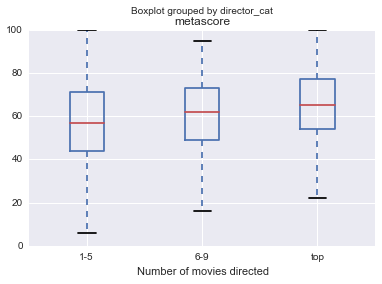

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
director_count = movie_inner.director_x.value_counts()
director_class = ['top' if item >= 10 else '6-9' if item > 5 else '1-5' for item in director_count] 
top_directors = director_count.index[[True if x == 'top' else False for x in director_class]]
mid_directors = director_count.index[[True if x == '6-9' else False for x in director_class]]
bottom_directors = director_count.index[[True if x == '1-5' else False for x in director_class]]

movie_inner['director_cat'] = ['top' if item in top_directors else '6-9' if item in mid_directors else '1-5' \
                               for item in movie_inner['director_x']]

x = movie_inner[['director_cat','metascore']].dropna()
x.boxplot(by='director_cat')
plt.xlabel('Number of movies directed')

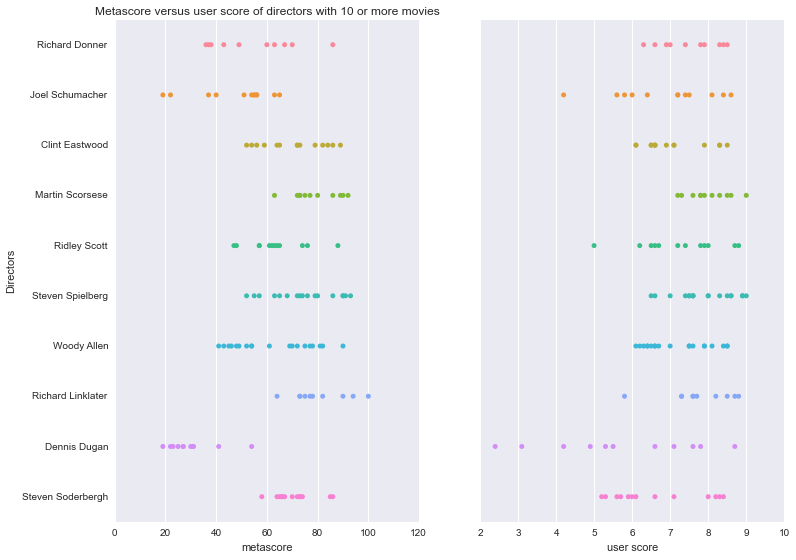

In [67]:
top = movie_inner[movie_inner.director_cat=="top"]
top_x = top[['director_x','metascore']].dropna()
#top_xplt.subplots(1,2,2)
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

fig.set_figheight(9)
fig.set_figwidth(12)

seaborn.stripplot(x="metascore", y="director_x", data=top_x, ax=axes[0])
axes[0].set_ylabel("Directors")
axes[0].set_title("Metascore versus user score of directors with 10 or more movies")


user_x = top[['director_x','user_score']].dropna()
user_x = user_x[user_x.user_score != 'tbd']
user_x['score'] = [float(x) for x in user_x.user_score]

seaborn.stripplot(x="score", y="director_x", data=user_x, ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("user score")

#plt.title("Metascore of directors with 10 or more movies")

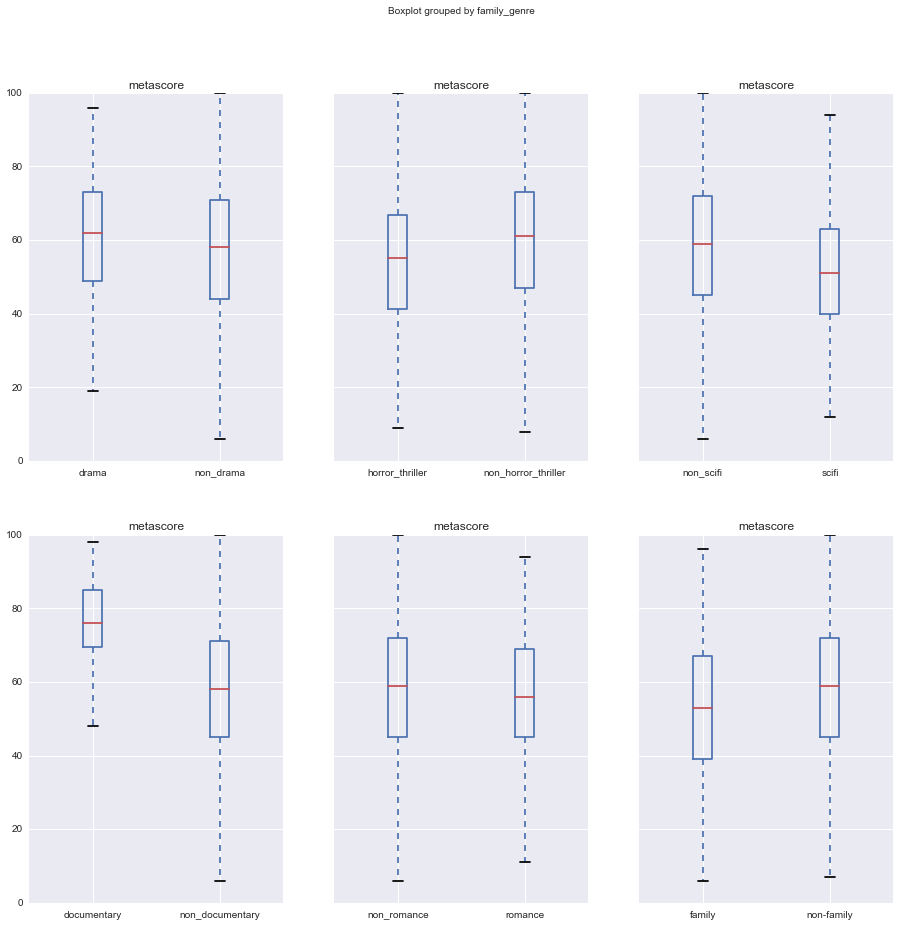

In [63]:
movie_inner['comedy_genre'] = movie_inner['genre'].apply(lambda x: 'drama' if x.find('Drama') > 0 else "non_drama")
movie_inner['horror_genre'] = movie_inner['genre'].apply(lambda x: 'horror_thriller' if x.find('Horror') > 0 else 'horror_thriller' \
                                        if x.find('Thriller') > 0 else "non_horror_thriller")
# movie_inner['action_genre'] = movie_inner['genre'].apply(lambda x: 'action' if x.find('Action') > 0 else 'non_action')
movie_inner['scifi_genre'] = movie_inner['genre'].apply(lambda x: 'scifi' if x.find('Sci-Fi') > 0 else 'non_scifi')
movie_inner['documentary_genre'] = movie_inner['genre'].apply(lambda x: 'documentary' if x.find('Documentary') > 0 else 'non_documentary')
movie_inner['romance_genre'] = movie_inner['genre'].apply(lambda x: 'romance' if x.find('Romance') > 0 else 'non_romance')
movie_inner['family_genre'] = movie_inner['genre'].apply(lambda x: 'family' if x.find('Family') > 0 else 'non-family')


x_comedy = movie_inner[['comedy_genre','metascore']].dropna()
x_horror = movie_inner[['horror_genre','metascore']].dropna()
# x_action= movie_inner[['action_genre','metascore']].dropna()
x_scifi = movie_inner[['scifi_genre','metascore']].dropna()
x_docu = movie_inner[['documentary_genre','metascore']].dropna()
x_romance = movie_inner[['romance_genre','metascore']].dropna()
x_family = movie_inner[['family_genre','metascore']].dropna()

fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True)

fig.set_figheight(15)
fig.set_figwidth(15)

x_comedy.boxplot(by='comedy_genre', ax=axes[0,0])
axes[0,0].set_xlabel("")
x_horror.boxplot(by='horror_genre', ax=axes[0,1])
axes[0,1].set_xlabel("")
# x_action.boxplot(by='action_genre', )
x_scifi.boxplot(by='scifi_genre', ax=axes[0,2])
axes[0,2].set_xlabel("")
x_docu.boxplot(by='documentary_genre', ax=axes[1,0])
axes[1,0].set_xlabel("")
x_romance.boxplot(by='romance_genre', ax=axes[1,1])
axes[1,1].set_xlabel("")
x_family.boxplot(by='family_genre', ax=axes[1,2])
axes[1,2].set_xlabel("")


[u'Gore Verbinski', u'Richard Kelly', u'Ari Sandel', u'Mike McCoyScott Waugh', u'Kirk De MiccoChris Sanders', u'Colin StrauseGreg Strause', u'William H. Macy', u'Rupert Sanders']


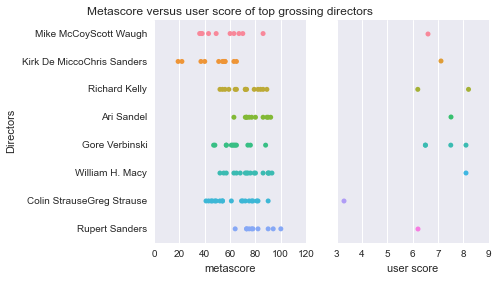

In [53]:
director_gross = movie_inner.groupby('director_x').total_gross.sum()
top_grossers = [x for x in director_count.index[[True if x >= 3000000000 else False for x in director_gross]]]
#mid_directors = director_count.index[[True if x == '6-9' else False for x in director_class]]
#bottom_directors = director_count.index[[True if x == '1-5' else False for x in director_class]]
print top_grossers
toptop = movie_inner[movie_inner.director_x.isin(top_grossers)]
top_xx = top[['director_x','metascore']].dropna()
#top_xplt.subplots(1,2,2)
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

seaborn.stripplot(x="metascore", y="director_x", data=top_xx, ax=axes[0])
axes[0].set_ylabel("Directors")
axes[0].set_title("Metascore versus user score of top grossing directors")

user_xx = toptop[['director_x','user_score']].dropna()
user_xx = user_xx[user_xx.user_score != 'tbd']
user_xx.
user_xx['score'] = [float(x) for x in user_xx.user_score]

seaborn.stripplot(x="score", y="director_x", data=user_xx, ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("user score")

#plt.title("Metascore of directors with 10 or more movies")


In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df['pred4'] = model4.predict(df)
df['pred6'] = model6.predict(df)

with sns.axes_style('white'):
    plot = df.plot(kind='scatter',
                      x='metascore',
                      y='pred6',
                      alpha=0.2,
                      figsize=(10,6))
    plot.set_title("")
    plot.set_ylim(0,120)
    plot.set_xlabel("actual metascore")
    plot.set_ylabel("predicted")


NameError: name 'model6' is not defined

In [ ]:
import statsmodels.api as sm

df = merged_df[['international_gross']]
Y = df.domestic_gross
X = sm.add_constant(df.opening_weekend_take)

linmodel = sm.OLS(Y,X).fit()
linmodel.summary()

(50, 200)

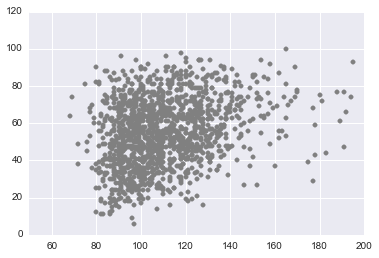

In [133]:
plt.scatter(df.runtime_minutes, df.metascore, color='gray')
plt.xlim(50,200)